# Split evaluation data

- From the csv file, group the speakers. Then select 5 speakers for whom we choose 101 samples: 1 is used for finetuning the model and the rest to compute the objective evaluation

- Folder structure:
    - `data/eval/`: contains the evaluation data
        - `finetune/`: contains the finetuning data
        - `objective/`: contains the objective evaluation data

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import matplotlib.pyplot as plt

from conf.hydra_config import (
    MainConfig,
)
import librosa

cfg = MainConfig
cfg.dataset.name

'SWARA'

In [14]:
os.getcwd()

'/workspace/local/evaluation'

- We need to avoid the overlap between speakers from train and those from eval. So we need to select 5 speakers from the csv file that are not in the train set.

In [15]:
SPEAKERS_IN_TRAIN = [1, 2, 7, 10, 11, 14, 15, 19, 20, 22, 28, 30, 31, 33, 34, 35, 36, 39]
SPEAKERS_IN_TRAIN_SET = set(SPEAKERS_IN_TRAIN)
print(len(SPEAKERS_IN_TRAIN))

18


In [16]:
import os
# Define the column names
column_names = ['path', 'transcript', 'speaker_id']

# Load the metadata from the CSV file
# metadata_csv_path = 'metadata_SWARA_ALL_2.csv'
metadata_csv_path = 'metadata_SWARA1.0_text.csv'


path_exists = os.path.exists(metadata_csv_path)
print(path_exists)

metadata_df = pd.read_csv(metadata_csv_path, 
                          delimiter="|",
                          header=None,
                          names=column_names)
# Shuffle the metadata
metadata_df = metadata_df.sample(frac=1, random_state=42).reset_index(drop=True)

True


In [17]:
# Extract relevant information from the metadata
filepaths = metadata_df['path']
transcripts = metadata_df['transcript']
speaker_ids = metadata_df['speaker_id']

In [18]:
ALL_SPEAKERS = sorted(metadata_df['speaker_id'].value_counts().index.tolist())
print(len(ALL_SPEAKERS))
ALL_SPEAKERS_SET = set(ALL_SPEAKERS)
print(len(ALL_SPEAKERS_SET))

18
18


In [19]:
NEW_SPEAKERS = list(ALL_SPEAKERS_SET - SPEAKERS_IN_TRAIN_SET)
print(len(NEW_SPEAKERS))
NEW_SPEAKERS

0


[]

In [20]:
# Randomly select 5 speakers for the validation set
import numpy as np

NEW_SPEAKERS = np.array(NEW_SPEAKERS)
print(NEW_SPEAKERS)

speakers_in_val = np.random.choice(NEW_SPEAKERS, 5, replace=False)
sorted(speakers_in_val)

[]


ValueError: 'a' cannot be empty unless no samples are taken

- For each speaker in the evaluation set, randomly extract 101 samples from the original dataframe.

In [ ]:
speakers_in_val = []

In [11]:
evaluation_samples = metadata_df[metadata_df['speaker_id'].isin(speakers_in_val)]

NameError: name 'speakers_in_val' is not defined

In [13]:
sorted(evaluation_samples["speaker_id"].value_counts().index.tolist())

[0, 13, 24, 29, 40]

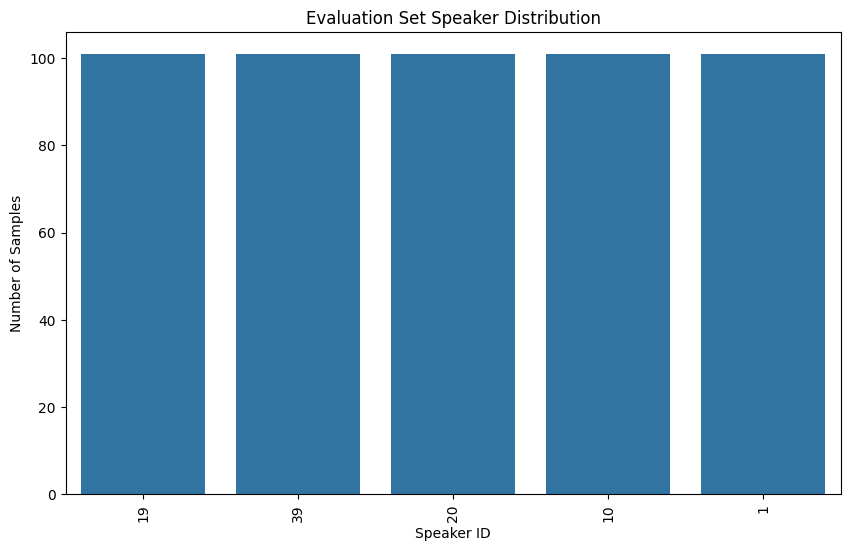

In [13]:
# Get 101 random samples for each speaker
evaluation_samples = evaluation_samples.groupby('speaker_id').head(101)

# Visualize the distribution of speakers in the evaluation set
plt.figure(figsize=(10, 6))
sns.countplot(data=evaluation_samples, x="speaker_id", order=evaluation_samples["speaker_id"].value_counts().index)
plt.title('Evaluation Set Speaker Distribution')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

In [30]:
evaluation_samples

,path,transcript,speaker_id
1,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bal_...,Vâlcea nu a avut deloc parte de un meci liniștit.,0
17,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bal_...,Declară viceprimarul Cornel Ionică.,0
25,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/ccl_...,"Dar, de la o vreme încoace, cam de pe când ția...",8
27,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bvl_...,Femeia este acuzată de săvârșirea infracțiunil...,6
30,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bvl_...,Și mi-a plăcut foarte tare.,6
...,...,...,...
4213,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_...,Toți elevii de la Lombardo Radice vorbesc flue...,24
4297,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_...,Vom discuta în consiliul de administrație pent...,24
4319,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_...,Trebuie să practicăm un joc foarte bun și să f...,24
4533,/media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_...,"Raportat la tehnica procesului tehnologic, pro...",24


In [31]:
# Sort the evaluation samples by speaker ID
evaluation_samples = evaluation_samples.sort_values(by='speaker_id')

In [32]:
# Save the current evaluation set to a CSV file using the same structure as the DataLoader
evaluation_samples.to_csv('evaluation.csv', index=False, sep="|", header=False)

In [33]:
# Extract the first occurance of each speaker in the evaluation set into a separate DataFrame
reference_speech_samples = evaluation_samples.groupby('speaker_id').first().reset_index()
reference_speech_samples.value_counts()

speaker_id  path                                                        transcript                                                                        
0           /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bal_rnd1_466.wav  Vâlcea nu a avut deloc parte de un meci liniștit.                                     1
6           /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bvl_rnd2_232.wav  O să vedem dacă dau afară pe cineva sau nu.                                           1
8           /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/ccl_ivan_280.wav  Mia luat el Dumnezeu turbinca din pricina ta, dar încaltea țiam făcuto bună și eu.    1
24          /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_rnd2_408.wav  Guvernul britanic a comandat șaizeci de milioane de doze.                             1
37          /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/smm_rnd2_037.wav  După o vară plină de tensiune, învățământul românesc trece într-o altă etapă.         1
Name: count, dtype: int64

- Manually extract the above speakers from the csv file 

speaker_id
0     101
6     101
8     101
24    101
37    101
Name: count, dtype: int64


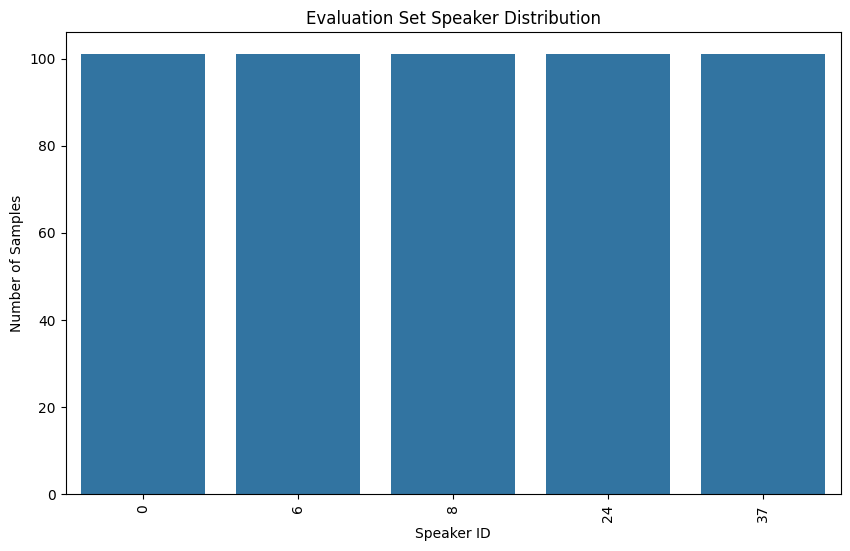

In [34]:
# Visualize the distribution of speakers in the evaluation set
print(evaluation_samples["speaker_id"].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=evaluation_samples, x="speaker_id", order=evaluation_samples["speaker_id"].value_counts().index)
plt.title('Evaluation Set Speaker Distribution')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

# Visualize after manually extracting samples

speaker_id
0     100
6     100
8     100
24    100
37    100
Name: count, dtype: int64


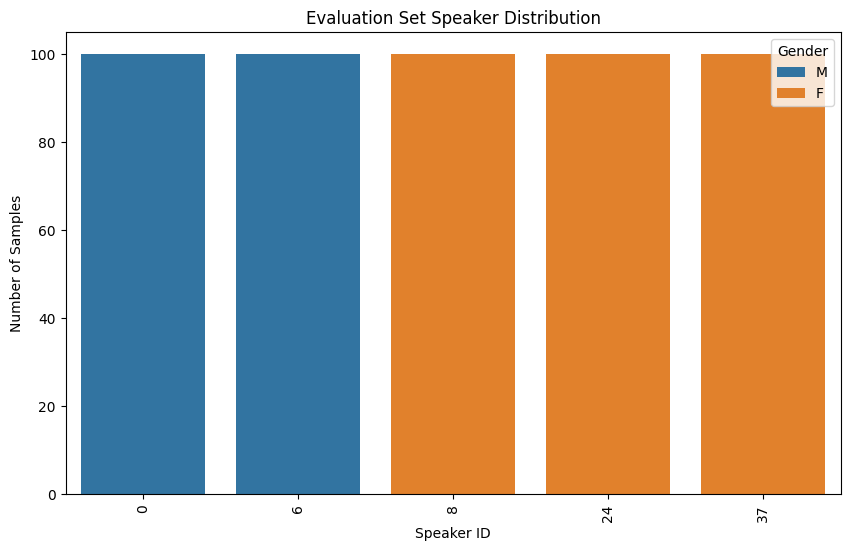

In [31]:
eval_samples = pd.read_csv('evaluation.csv', delimiter="|", header=None, names=column_names)

# Assuming speaker_gender_dict is your dictionary mapping speaker IDs to genders
speaker_gender_dict = {0: 'M', 6: 'M', 8: 'F', 24: 'F', 37: 'F'}

# Create a new column 'gender' in the DataFrame
eval_samples['Gender'] = eval_samples['speaker_id'].map(speaker_gender_dict)

# Visualize the distribution of speakers in the evaluation set
print(eval_samples["speaker_id"].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=eval_samples, x="speaker_id", hue='Gender', order=eval_samples["speaker_id"].value_counts().index)
plt.title('Evaluation Set Speaker Distribution')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

                                                path  \
0  /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bal_...   
1  /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/bvl_...   
2  /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/ccl_...   
3  /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/mrl_...   
4  /media/DATA/CORPORA/SWARA2.0/SWARA2.0_22k/smm_...   

                                          transcript  speaker_id gender  
0  Vâlcea nu a avut deloc parte de un meci liniștit.           0      M  
1        O să vedem dacă dau afară pe cineva sau nu.           6      M  
2  Mia luat el Dumnezeu turbinca din pricina ta, ...           8      F  
3  Guvernul britanic a comandat șaizeci de milioa...          24      F  
4  După o vară plină de tensiune, învățământul ro...          37      F  
speaker_id
0     1
6     1
8     1
24    1
37    1
Name: count, dtype: int64


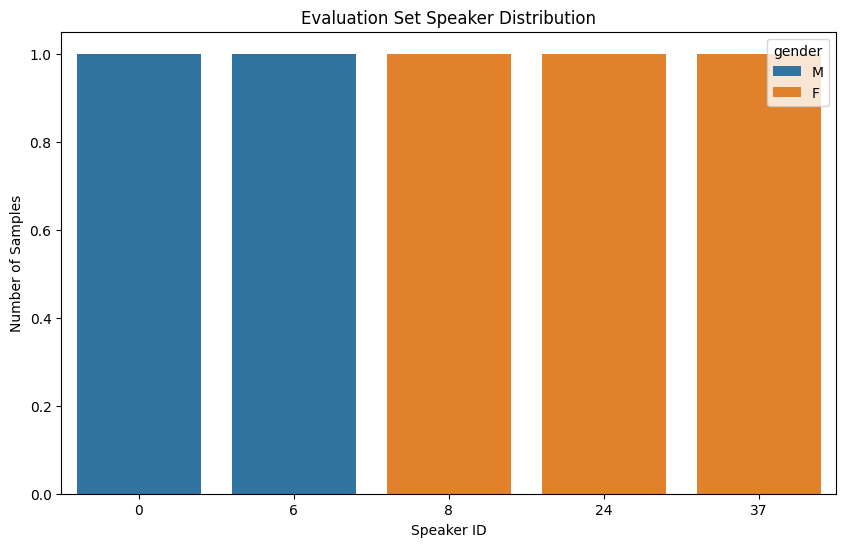

In [26]:
finetune_samples = pd.read_csv('reference_speech_samples.csv', delimiter="|", header=None, names=column_names)

speaker_info = {
    "speaker_id": finetune_samples["speaker_id"].values,
    "gender": ['M', 'M', 'F', 'F', 'F']
}
speaker_info = pd.DataFrame(speaker_info)
finetune_samples = finetune_samples.merge(speaker_info, on='speaker_id')
print(finetune_samples)


# Visualize the distribution of speakers in the evaluation set
print(finetune_samples["speaker_id"].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=finetune_samples, x="speaker_id", hue="gender", order=finetune_samples["speaker_id"].value_counts().index)
plt.title('Evaluation Set Speaker Distribution')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
# plt.xticks(rotation=90)
plt.show()